         RND      ADMIN        MKT       STATE     PROFIT
0  165349.20  136897.80  471784.10    New York  192261.83
1  162597.70  151377.59  443898.53  California  191792.06
2  153441.51  101145.55  407934.54     Florida  191050.39
3  144372.41  118671.85  383199.62    New York  182901.99
4  142107.34   91391.77  366168.42     Florida  166187.94
Mean Squared Error: 10857642469.56977
R-squared: -23081202374.897926


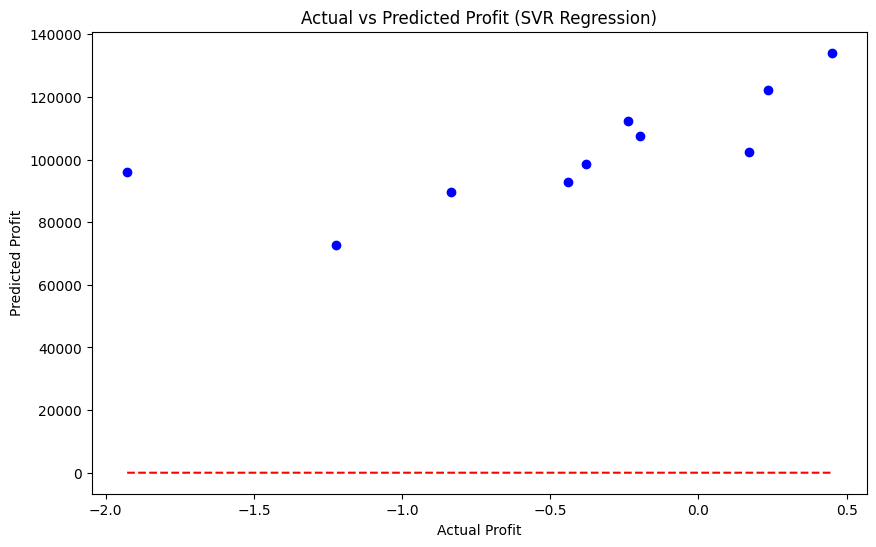

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv('50_Startups.csv')

# Display the first few rows of the dataset
print(df.head())

# Encode categorical data (State column)
labelencoder = LabelEncoder()
df['STATE'] = labelencoder.fit_transform(df['STATE'])

# Define features (X) and target (y)
X = df.drop('PROFIT', axis=1).values  # Features: R&D Spend, Administration, Marketing Spend, State
y = df['PROFIT'].values  # Target: Profit

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Reshape y_train and y_test because SVR expects 2D array for target variable
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Scale target variable
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Initialize the Support Vector Regressor model
svr = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel is commonly used

# Fit the model on the training data
svr.fit(X_train, y_train.ravel())

# Predict the target values for the test set
y_pred = svr.predict(X_test)

# Inverse transform the predicted values to get them back to original scale
y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting actual vs predicted values for the test set
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Profit (SVR Regression)')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

# Hyperparameter Tuning with Grid Search
param_grid = {
    'C': [1, 10, 100, 1000],  # Regularization parameter
    'epsilon': [0.01, 0.1, 0.2],  # Epsilon value
    'kernel': ['rbf', 'poly', 'linear'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1, 10]  # Gamma parameter for RBF kernel
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train.ravel())

# Print best parameters found by GridSearch
print(f"Best Parameters: {grid_search.best_params_}")

# Use the best estimator from GridSearchCV
best_svr = grid_search.best_estimator_

# Predict using the best model
y_pred_best = best_svr.predict(X_test)

# Inverse transform the predicted values to get them back to original scale
y_pred_best = scaler_y.inverse_transform(y_pred_best.reshape(-1, 1))

# Evaluate the best model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Optimized Mean Squared Error: {mse_best}')
print(f'Optimized R-squared: {r2_best}')

# Visualize the predictions of the optimized model (optional)
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_best, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Profit (Optimized SVR Model)')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.show()

# Feature scaling insights (not directly available for SVR but useful)
print(f"Feature Scaling Applied: {scaler_X.mean_}, {scaler_X.scale_}")
